<a href="https://colab.research.google.com/github/xvrfcsxul/mlproject/blob/main/linear1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка данных с диска

In [1]:
! gdown 1JK6UkB2NHwtRfZq0UA7peNlP9nkCeCnH
! unzip -o /content/leopard-challenge-regression.zip -d /content/leoaprd-challenge-regression

Downloading...
From: https://drive.google.com/uc?id=1JK6UkB2NHwtRfZq0UA7peNlP9nkCeCnH
To: /content/leopard-challenge-regression.zip
100% 1.00M/1.00M [00:00<00:00, 8.26MB/s]
Archive:  /content/leopard-challenge-regression.zip
  inflating: /content/leoaprd-challenge-regression/sample_submission.csv  
  inflating: /content/leoaprd-challenge-regression/test.csv  
  inflating: /content/leoaprd-challenge-regression/train.csv  


Загрузка библиотек

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model, ensemble

In [3]:
train = pd.read_csv('/content/leoaprd-challenge-regression/train.csv')
test = pd.read_csv('/content/leoaprd-challenge-regression/test.csv')
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train.shape

(18373, 22)

In [6]:
train.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
count,18373.000000,1.837300e+04,18373.000000,18373.000000,14905.000000,14903.000000,14798.000000,13579.000000,7750.000000,8944.000000,15041.000000,15041.000000,18372.000000,18373.000000
mean,2.936592,1.053235e+06,10.403962,3107.258314,2.914928,1.538683,1.617313,558.937403,151.133167,1965.925089,-37.809872,144.996486,7518.621489,17490.731889
std,0.955952,6.217973e+05,6.018424,95.285542,0.962743,0.688374,0.957072,3991.516323,519.517626,36.958956,0.081272,0.106536,4487.143499,10075.864589
min,1.000000,2.270000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,2.000000
25%,2.000000,6.350000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1950.000000,-37.858180,144.931400,4294.000000,8749.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803600,145.001100,6567.000000,17497.000000
75%,3.000000,1.301000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,173.862500,2000.000000,-37.756100,145.060190,10331.000000,26286.000000
max,12.000000,5.580000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,34856.000000


Смотрим процент пропусков в данных

In [7]:
train.isna().mean() * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2         18.875524
Bathroom         18.886409
Car              19.457900
Landsize         26.092636
BuildingArea     57.818538
YearBuilt        51.319872
CouncilArea       0.005443
Lattitude        18.135307
Longtitude       18.135307
Regionname        0.005443
Propertycount     0.005443
id                0.000000
dtype: float64

Размерность данных

In [8]:
print('Число объектов: ', train.shape[0], '\n',
      'Число признаков: ', train.shape[1], sep='')

Число объектов: 18373
Число признаков: 22


In [9]:
test.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
count,8818.000000,8817.000000,8817.000000,5858.000000,5854.000000,5582.000000,4365.000000,2882.000000,3112.000000,5908.000000,5908.000000,8816.000000,8818.000000
mean,3.109549,13.134127,3127.554384,3.381871,1.724120,1.976173,700.659336,171.632200,1968.751928,-37.799458,144.997531,7668.367627,17295.584826
std,0.934280,7.852206,137.628532,0.837767,0.708429,1.040295,2928.526260,140.695197,35.968997,0.113661,0.150998,4498.895777,10008.851866
min,1.000000,0.000000,3000.000000,1.000000,1.000000,0.000000,29.000000,0.000000,1820.000000,-38.190430,144.423790,83.000000,1.000000
25%,3.000000,7.200000,3047.000000,3.000000,1.000000,1.000000,410.000000,118.000000,1950.000000,-37.871178,144.907508,4380.000000,8620.750000
50%,3.000000,12.000000,3095.000000,3.000000,2.000000,2.000000,587.000000,151.000000,1975.000000,-37.791325,145.012550,6763.000000,17271.500000
75%,4.000000,17.300000,3165.000000,4.000000,2.000000,2.000000,696.000000,200.000000,2000.000000,-37.723930,145.092100,10529.000000,25942.500000
max,16.000000,48.100000,3978.000000,16.000000,9.000000,18.000000,146699.000000,6178.000000,2019.000000,-37.397800,145.523700,21650.000000,34846.000000


Процент пропусков в тестовой выборке

In [10]:
test.isna().mean() * 100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.011340
Postcode          0.011340
Bedroom2         33.567702
Bathroom         33.613064
Car              36.697664
Landsize         50.498979
BuildingArea     67.316852
YearBuilt        64.708551
CouncilArea       0.022681
Lattitude        33.000680
Longtitude       33.000680
Regionname        0.022681
Propertycount     0.022681
id                0.000000
dtype: float64

Размерность тестовой выборки

In [11]:
print('Число объектов: ', test.shape[0], '\n',
      'Число признаков: ', test.shape[1], sep='')

Число объектов: 8818
Число признаков: 21


Убираем все строки с пропусками

Убираем все столбцы со строковыми переменными

In [12]:
train=train.dropna().reset_index(drop=True)
train = train.drop(train.select_dtypes(include='object').columns, axis=1)

In [13]:
print('Число объектов: ', train.shape[0], '\n',
      'Число признаков: ', train.shape[1], sep='')

Число объектов: 6816
Число признаков: 14


Убираем все строки с пропусками

Убираем все столбцы со строковыми переменными

In [14]:
test=test.dropna().reset_index(drop=True)
test = test.drop(test.select_dtypes(include='object').columns, axis=1)

In [15]:
print('Число объектов: ', test.shape[0], '\n',
      'Число признаков: ', test.shape[1], sep='')

Число объектов: 2049
Число признаков: 13


Сталкиваемся с проблемой, что у тестовой выборки нет колонки Price.

Из этой ситуации есть 2 выхода:

1) Разбить выборку для обучения на 2 части

2) Заполнить случайными значениями

Выбираем второй вариант, чтобы не жертвовать размером выборки для обучения

In [16]:
test['Price'] = np.random.uniform(min(train['Price']), max(train['Price']), size=test.shape[0])

Так как предсказываем цену, возьмем её за целевую переменную

In [17]:
training_values = train['Price']
training_points = train.drop('Price', axis=1)

In [18]:
training_points.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
0,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,33247
1,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,31886
2,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,16809
3,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,18292
4,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,11545


In [19]:
training_points.shape

(6816, 13)

Создаем модель линейной регрессии

In [20]:
linear_regression_model = linear_model.LinearRegression()

Обучаем модель

In [21]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [22]:
test_values = test['Price']
test_points = test.drop('Price', axis=1)

In [23]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [24]:
len(test_values)

2049

In [25]:
len(test_points)

2049

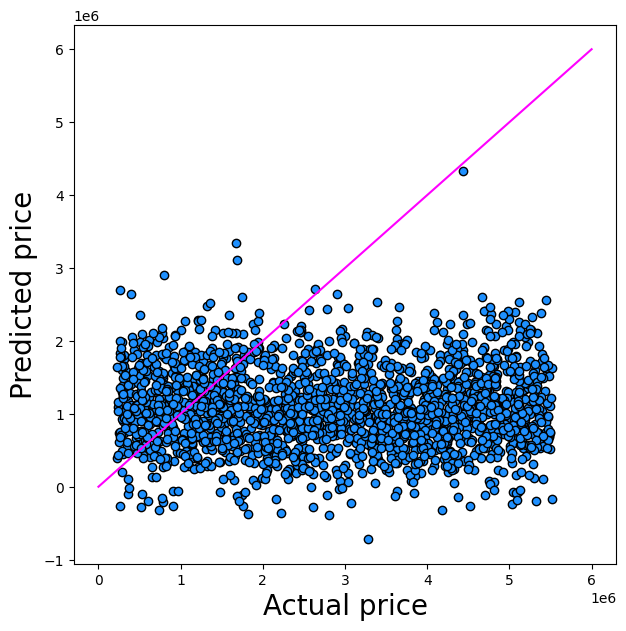

In [26]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values,test_predictions_linear,color='dodgerblue',edgecolors='black') # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6], color='fuchsia') # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20);

In [28]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

In [29]:
print("MAE: {0:7.2f}, \nRMSE: {1:7.2f}".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

MAE: 1993278.96, 
RMSE: 2411822.21


Как видно, на такой сложной задаче линейная регрессия работает ужасно